
# "Анализ поведения пользоватетей игры Quiz Freeze" 

## Проблемная ситуация

### В рамках взаимодействия с игрой пользователи используют различные стратегии, каждая из которых имеет свой потенциал конверсии пользователя в покупателя.  Следовательно, стратегии поведения различаются с точки зрения коммерческой выгоды. Остается непонятным, насколько алгоритмы прохождения игры прозрачны пользователям. В ходе исследования на примере наблюдения за период один календарный год (2018 год) предполагается проверка 3 гипотез:

### Гипотеза 1
Должна быть разница в поведении групп, которые проходят и не проходят обучение. Влияет ли обучение на скорость прохождения других этапов игры?

### Гипотеза 2
Возможно, повторное прохождение обучения положительно влияет на оплату

### Гипотеза 3
Если пользователь сначала выбирает сложность обучения, то потом он потом проходить обучение

## Цель исследования 

### Исследовать поведение пользователей в обновлённом приложении

## Задачи
### В рамках проверки гипотез необходимо решить три задачи:

### 1. Определить, насколько обучение сокращает время прохождения этапов игры.
### 2. Проверить, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.
### 3. Определить, насколько прозрачен процесс взаимодействия с игрой.


## Этап обработки исходных данных

Импортируем необходимые модули (Numpy, Pandas), создадим исходные датафреймы из csv-файлов. Проведем первичный анализ данных в исходных файлах. 

In [1]:
import numpy as np
import pandas as pd
import datetime
event = pd.read_csv('data\Events.csv', sep=',') # экспортируем файл событий
events_df = event.copy() # после записи в переменную csv-файла создаем копию ,с которой и будем работать.
display("events_df - переменная с 1-м исходным файлом для анализа")
display(events_df.head())
print()
display("Первичная информация о 1-м исходном файле") 
display(events_df.info()) # Знакомимся с содержанием таблицы событий.
display(events_df.describe(include='all')) # выводим все типы данных, имеющихся в таблице, получив описательную статистику дадафрейму
display("Количество уникальных значений в столбце event_type (тип действия пользователя):", events_df['event_type'].unique())
display
(
    "Количество уникальных значений в столбце selected_level (выбор уровня сложности вопросов): ", 
    events_df['selected_level'].unique()
    ) 
display("Количество пользователей в 1-м исходном файле: ", events_df['user_id'].nunique()) 
print()

purchase = pd.read_csv('data\purchase.csv', sep=',') # экспортируем файл информации о покупках 
purchase_df = purchase.copy() # после записи в переменную csv-файла создаем копию, с которой и будем работать.
display("purchase_df - переменная для записи 2-го исходного файла")
display(purchase_df.head())
print("\t Количество уникальных значений в столбцах event_type и select_level совпадает с описанием исходной таблицы. Количество строк в столбцах id, event_type, user_id, start_tyme совпадает.\n Пропусков нет, дубликатов нет")
display("Первичная информация о  2-м исходном файле")
purchase_df.info()
display(purchase_df.describe(include='all')) # выводим все типы данных, имеющихся в таблице
print("Количество строк в столбцах совпадает. На данном этапе дополнительно преобразовывать файл необязательно")

'events_df - переменная с 1-м исходным файлом для анализа'

,id,event_type,selected_level,start_time,tutorial_id,user_id
0,28903,registration,NaN,2016-05-11T23:40:55,NaN,12583
1,28904,registration,NaN,2016-05-11T23:49:58,NaN,12584
2,28905,registration,NaN,2016-05-12T00:53:07,NaN,12585
3,28906,tutorial_start,NaN,2016-05-12T01:32:20,17562.0,12585
4,28907,tutorial_finish,NaN,2016-05-12T01:34:53,17562.0,12585


'Первичная информация о 1-м исходном файле'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252334 entries, 0 to 252333
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              252334 non-null  int64  
 1   event_type      252334 non-null  object 
 2   selected_level  31086 non-null   object 
 3   start_time      252334 non-null  object 
 4   tutorial_id     125103 non-null  float64
 5   user_id         252334 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.6+ MB


None

,id,event_type,selected_level,start_time,tutorial_id,user_id
count,252334.00000,252334,31086,252334,125103.000000,252334.000000
unique,NaN,5,3,251565,NaN,NaN
top,NaN,registration,medium,2017-05-29T11:03:08,NaN,NaN
freq,NaN,74908,17408,16,NaN,NaN
mean,155069.50000,NaN,NaN,NaN,51815.675364,50003.098790
std,72842.69575,NaN,NaN,NaN,19792.496704,21586.690775
min,28903.00000,NaN,NaN,NaN,17562.000000,12583.000000
25%,91986.25000,NaN,NaN,NaN,34666.000000,31302.000000
50%,155069.50000,NaN,NaN,NaN,51794.000000,49983.000000
75%,218152.75000,NaN,NaN,NaN,68961.500000,68670.000000


'Количество уникальных значений в столбце event_type (тип действия пользователя):'

array(['registration', 'tutorial_start', 'tutorial_finish',
       'level_choice', 'pack_choice'], dtype=object)

'Количество пользователей в 1-м исходном файле: '

74908

'purchase_df - переменная для записи 2-го исходного файла'

,id,user_id,event_datetime,amount
0,15674,12584,2016-05-12T10:34:16,100
1,15675,12985,2016-05-13T08:25:56,50
2,15676,12828,2016-05-13T16:33:46,50
3,15677,12598,2016-05-14T01:09:37,150
4,15678,13037,2016-05-14T01:24:46,100


	 Количество уникальных значений в столбцах event_type и select_level совпадает с описанием исходной таблицы. Количество строк в столбцах id, event_type, user_id, start_tyme совпадает.
 Пропусков нет, дубликатов нет


'Первичная информация о  2-м исходном файле'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5956 non-null   int64 
 1   user_id         5956 non-null   int64 
 2   event_datetime  5956 non-null   object
 3   amount          5956 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 186.2+ KB


,id,user_id,event_datetime,amount
count,5956.000000,5956.000000,5956,5956.000000
unique,NaN,NaN,5955,NaN
top,NaN,NaN,2019-04-19T15:42:47,NaN
freq,NaN,NaN,2,NaN
mean,18651.500000,50224.943251,NaN,108.919577
std,1719.493433,21458.351127,NaN,55.786902
min,15674.000000,12584.000000,NaN,25.000000
25%,17162.750000,31701.500000,NaN,50.000000
50%,18651.500000,50343.500000,NaN,100.000000
75%,20140.250000,68584.500000,NaN,150.000000


Количество строк в столбцах совпадает. На данном этапе дополнительно преобразовывать файл необязательно


Преобразуем файлы для проведения последующего анализа. Для этого выделим данные за 2018 год. Переименуем столбцы и создадим объединенную таблицу, включающую данные о действиях пользователей, в том числе, оплату новых пакетов игровых впросов. 

In [2]:
display("Возьмем из 1-й таблицы данные только за 2018 год, записав в новый датафрэйм events_df_2018")
# отфильтруем данные о пользователях, зарегистрировавшихся в 2018 году
mask = (events_df['start_time'] >='2018-01-01')&(events_df['start_time'] <='2018-12-31')&(events_df['event_type'] =='registration') 
user_2018 = events_df[mask]['user_id'].to_list()
events_df_2018 = events_df[events_df['user_id'].isin(user_2018)]

display(events_df_2018.head())
display("Общая информация о таблице events_df_2018")
display()
events_df_2018.info() # После перезаписи видно,  таблица сократилась по сравнению с исходной
display(events_df_2018.describe(include='all'))
display("Количество уникальных значений в столбце event_type (тип события пользователя): ", events_df_2018['event_type'].unique()) 
display("Количество уникальных значений в столбце selected_level (выбор уровня сложности вопросов):", events_df_2018['selected_level'].unique())


purchase_df_2018 = purchase_df[purchase_df['user_id'].isin(user_2018)]
display("Выделим пользователей, совершавших покупки в 2018 году, записав в новый датафрэйм purchase_df_2018")
display(purchase_df_2018.head())
display()
display("Общая информация о таблице purchase_df_2018")
display()
purchase_df_2018.info() # После перезаписи видно, что таблица сократилать по сравненю с исходной

purchase_df_2018['event_type'] = 'purchase' # создаем новый столбец "event_type" (тип события пользователя) с записью в строке "purchase" (покупка)
display("Таблица purchase_df_2018 с новым столбцом", purchase_df_2018.head())

events_df_2018 = events_df_2018.rename(columns={'id':'event_id'}) # переименуем столбец в таблице событий за 2018 год
purchase_df_2018 = purchase_df_2018.rename(columns={'id':'purchase_id','event_datetime':'start_time'}) # переименовываем столбец в таблице покупок за 2018 год
total_events_df = pd.concat([events_df_2018,purchase_df_2018], sort=False) # объединяем таблицы
total_events_df['start_time'] = pd.to_datetime(total_events_df['start_time']) # преобразовываем данные столбца о времени старта обучения объединенной таблице во временной тип. 
total_events_df = total_events_df.reset_index(drop=True) 

display("Объединенная таблица: ", total_events_df.head()) # проверяем правильно ли объединили таблицу
display("Общая информация об объединенной таблице")
display(total_events_df.info()) # проверяем изменение типа данных в столбце времени

#total_events_df1 = total_events_df.drop(['event_id', 'selected_level', 'tutorial_id', 'purchase_id', 'amount'], axis=1) # Убираем лишние столбцы.
#display(total_events_df1.head())

total_events_df2 = total_events_df[['user_id', 'event_type', 'start_time' ]] # Или оставляем только нужные столбцы
display("Данная таблица будет использована при решении Задачи 1: ", total_events_df2.head())


'Возьмем из 1-й таблицы данные только за 2018 год, записав в новый датафрэйм events_df_2018'

,id,event_type,selected_level,start_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01T03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01T04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01T08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01T11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01T13:28:07,NaN,27836


'Общая информация о таблице events_df_2018'

<class 'pandas.core.frame.DataFrame'>
Index: 66929 entries, 51405 to 118338
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              66929 non-null  int64  
 1   event_type      66929 non-null  object 
 2   selected_level  8338 non-null   object 
 3   start_time      66929 non-null  object 
 4   tutorial_id     32942 non-null  float64
 5   user_id         66929 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.6+ MB


,id,event_type,selected_level,start_time,tutorial_id,user_id
count,66929.000000,66929,8338,66929,32942.000000,66929.000000
unique,NaN,5,3,66779,NaN,NaN
top,NaN,registration,medium,2018-03-13T09:37:43,NaN,NaN
freq,NaN,19914,4642,9,NaN,NaN
mean,113772.001016,NaN,NaN,NaN,40529.649323,37777.074273
std,19320.884180,NaN,NaN,NaN,5211.593585,5748.910912
min,80308.000000,NaN,NaN,NaN,31505.000000,27832.000000
25%,97040.000000,NaN,NaN,NaN,36007.000000,32847.000000
50%,113772.000000,NaN,NaN,NaN,40526.500000,37712.000000
75%,130504.000000,NaN,NaN,NaN,45052.000000,42722.000000


'Количество уникальных значений в столбце event_type (тип события пользователя): '

array(['registration', 'tutorial_start', 'tutorial_finish',
       'level_choice', 'pack_choice'], dtype=object)

'Количество уникальных значений в столбце selected_level (выбор уровня сложности вопросов):'

array([nan, 'medium', 'hard', 'easy'], dtype=object)

'Выделим пользователей, совершавших покупки в 2018 году, записав в новый датафрэйм purchase_df_2018'

,id,user_id,event_datetime,amount
1171,16845,27845,2018-01-03T18:53:43,100
1172,16846,27865,2018-01-04T14:46:10,250
1174,16848,27911,2018-01-07T08:19:12,50
1175,16849,27910,2018-01-07T12:11:34,100
1176,16850,27940,2018-01-07T13:16:41,200


'Общая информация о таблице purchase_df_2018'

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 1171 to 2778
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1600 non-null   int64 
 1   user_id         1600 non-null   int64 
 2   event_datetime  1600 non-null   object
 3   amount          1600 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.5+ KB


C:\Temp\ipykernel_11700\3764766559.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_df_2018['event_type'] = 'purchase' # создаем новый столбец "event_type" (тип события пользователя) с записью в строке "purchase" (покупка)


'Таблица purchase_df_2018 с новым столбцом'

,id,user_id,event_datetime,amount,event_type
1171,16845,27845,2018-01-03T18:53:43,100,purchase
1172,16846,27865,2018-01-04T14:46:10,250,purchase
1174,16848,27911,2018-01-07T08:19:12,50,purchase
1175,16849,27910,2018-01-07T12:11:34,100,purchase
1176,16850,27940,2018-01-07T13:16:41,200,purchase


'Объединенная таблица: '

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN


'Общая информация об объединенной таблице'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68529 entries, 0 to 68528
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        66929 non-null  float64       
 1   event_type      68529 non-null  object        
 2   selected_level  8338 non-null   object        
 3   start_time      68529 non-null  datetime64[ns]
 4   tutorial_id     32942 non-null  float64       
 5   user_id         68529 non-null  int64         
 6   purchase_id     1600 non-null   float64       
 7   amount          1600 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 4.2+ MB


None

'Данная таблица будет использована при решении Задачи 1: '

,user_id,event_type,start_time
0,27832,registration,2018-01-01 03:48:40
1,27833,registration,2018-01-01 04:07:25
2,27834,registration,2018-01-01 08:35:10
3,27835,registration,2018-01-01 11:54:47
4,27836,registration,2018-01-01 13:28:07


## Задача 1.
 Чтобы пределить, отличается ли время прохождения различных этапов у пользователей, которые прошли обучение, и пользователей, не начинавших обучение, и, если отличается, то насколько обучение сокращает время прохождения этапов игры, проанализируем при помощи построения сводных таблиц поведение пользоватетей, прошедших и не прошедших обучение, сравнивая их скорость перехода к покупке дополнительных вопросов.

 При этом будем считать, что нет принципиальной разницы между теми пользователями, что начинали обучение и не закончили его, и теми, кто даже не начинал обучение. То есть будем исходить из проверяемой гипотезы: успешное обучение влияет на решение продолжать играть и преобретать дополнительные вопросы. 

In [3]:
pivot_tedf_2018 = total_events_df.pivot_table( # создадим сводную таблицу на основе столбца "тип действия"
    values='start_time',
    index='user_id',
    columns='event_type',
    aggfunc='min' # агрегируем по самому ранннему действию
).reset_index(drop=False)

display("Сводная таблица 'Тип действия': ", pivot_tedf_2018.head())

tf_users_fin = total_events_df[total_events_df['event_type'] == 'tutorial_finish']['user_id'].unique() # выделим группу закончивших обучение, записав в отдельное множество
set_tf_users_fin = set(tf_users_fin)
tf_users_all = total_events_df['user_id'].unique() # выделим всех пользователей в отдельное множество
set_tf_users_all = set(tf_users_all)

display("Число всех пользователей ", len(set_tf_users_all))
display("Число пользователей, прошедших обучение", len(set_tf_users_fin))

# Добавим столбец, в котором разделим всех пользователей на прошедших и не прошедших обучение, применив  lambda-функцию для заполнения нового столбца
pivot_tedf_2018['tutorial_endet'] = pivot_tedf_2018.apply(lambda x: "прошли обучение" if x['user_id'] in set_tf_users_fin  else "не прошли обучение", axis=1) 
display("Таблица 'тип действия' с новым столбцом, разделяющим пользователей по принципу успешного прохождения обучения:", pivot_tedf_2018.head())

display("Общая информация о получившейся сводной таблице: есть данные о прохождении обучения для каждого пользователя")
display(pivot_tedf_2018.info())

pivot_mask_1 = pivot_tedf_2018[pivot_tedf_2018['tutorial_endet'] == "не прошли обучение"]
display("Часло пользователей, купивших вопросы, но не обучавшихся:", pivot_mask_1['purchase'].count()) 

display(pivot_mask_1.info())

pivot_mask_2 = pivot_tedf_2018[pivot_tedf_2018['tutorial_endet'] == "прошли обучение"]
pm1 = pivot_mask_2['purchase'].count() / pivot_tedf_2018['purchase'].count()
pm2 = pivot_mask_1['purchase'].count() / pivot_tedf_2018['purchase'].count()
display(" Доля прошедших обучение пользователей в числе покупателей: {:.2%}".format(pm1)) 
display("Доля не прошедших обучение пользователей в числе покупателей: {:.2%}".format(pm2)) 






"Сводная таблица 'Тип действия': "

event_type,user_id,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start
0,27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT
1,27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40
2,27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11
3,27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51
4,27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40


'Число всех пользователей '

19914

'Число пользователей, прошедших обучение'

10244

"Таблица 'тип действия' с новым столбцом, разделяющим пользователей по принципу успешного прохождения обучения:"

event_type,user_id,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,tutorial_endet
0,27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,не прошли обучение
1,27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,прошли обучение
2,27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,прошли обучение
3,27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,прошли обучение
4,27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,прошли обучение


'Общая информация о получившейся сводной таблице: есть данные о прохождении обучения для каждого пользователя'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19914 entries, 0 to 19913
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          19914 non-null  int64         
 1   level_choice     8338 non-null   datetime64[ns]
 2   pack_choice      5735 non-null   datetime64[ns]
 3   purchase         1600 non-null   datetime64[ns]
 4   registration     19914 non-null  datetime64[ns]
 5   tutorial_finish  10244 non-null  datetime64[ns]
 6   tutorial_start   11852 non-null  datetime64[ns]
 7   tutorial_endet   19914 non-null  object        
dtypes: datetime64[ns](6), int64(1), object(1)
memory usage: 1.2+ MB


None

'Часло пользователей, купивших вопросы, но не обучавшихся:'

153

<class 'pandas.core.frame.DataFrame'>
Index: 9670 entries, 0 to 19913
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          9670 non-null   int64         
 1   level_choice     841 non-null    datetime64[ns]
 2   pack_choice      561 non-null    datetime64[ns]
 3   purchase         153 non-null    datetime64[ns]
 4   registration     9670 non-null   datetime64[ns]
 5   tutorial_finish  0 non-null      datetime64[ns]
 6   tutorial_start   1608 non-null   datetime64[ns]
 7   tutorial_endet   9670 non-null   object        
dtypes: datetime64[ns](6), int64(1), object(1)
memory usage: 679.9+ KB


None

' Доля прошедших обучение пользователей в числе покупателей: 90.44%'

'Доля не прошедших обучение пользователей в числе покупателей: 9.56%'

Полученые данные позволяют нам сделать вывод о том, успешное обучение само по себе чаще приводит пользователей к покупке новых вопросов для продолжения игры. Группа прошедших обучение в 2018 году больше, тех, кто не учился или не закончил обучение практически в десять раз! 

Посмотним теперь, влияет ли успешное обучение на скорость принятия решения о покупке новых вопросов. 

In [4]:
display("Добавляем столбец, который определит количество часов, прошедших от регистрации до оплаты среди тех, кто прошел и не прошел обучение при помощи объекта Timedelta")

pivot_tedf_2018['timedelta'] = ((pivot_tedf_2018['purchase'] - pivot_tedf_2018['registration'])) /pd.Timedelta('1 hour') # если отключим pd.Timedelta('1 hour'), получим разницу в часах и минутах
display(pivot_tedf_2018.head())
td_mean = pivot_tedf_2018.groupby('tutorial_endet')['timedelta'].mean() # Высчитаем среднее количество часов, прошедших от регистрации до покупки у обучившихся и не обучившихся.

display("В среднем проходит часов от регистрации до покупки для тех, кто: ", td_mean)
t_1 = (td_mean['не прошли обучение'] - td_mean['прошли обучение']) # запишем в переменную знавение разности средних значений из переменной td_mean
display("Средняя разница во времени между регистрацией и оплатой у группы не прошедших обучение и группы прошедших обучение: ", t_1, "или 5 часов 34 минуты")


'Добавляем столбец, который определит количество часов, прошедших от регистрации до оплаты среди тех, кто прошел и не прошел обучение при помощи объекта Timedelta'

event_type,user_id,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,tutorial_endet,timedelta
0,27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,не прошли обучение,NaN
1,27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,прошли обучение,NaN
2,27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,прошли обучение,NaN
3,27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,прошли обучение,NaN
4,27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,прошли обучение,NaN


'В среднем проходит часов от регистрации до покупки для тех, кто: '

tutorial_endet
не прошли обучение    102.058920
прошли обучение        96.500902
Name: timedelta, dtype: float64

'Средняя разница во времени между регистрацией и оплатой у группы не прошедших обучение и группы прошедших обучение: '

5.558017695188852

'или 5 часов 34 минуты'

<Axes: title={'center': 'Средний интервал от регистрации до оплаты среди прошедших и не прошедших обучение пользователей'}, xlabel='Пользователи', ylabel='Часы'>

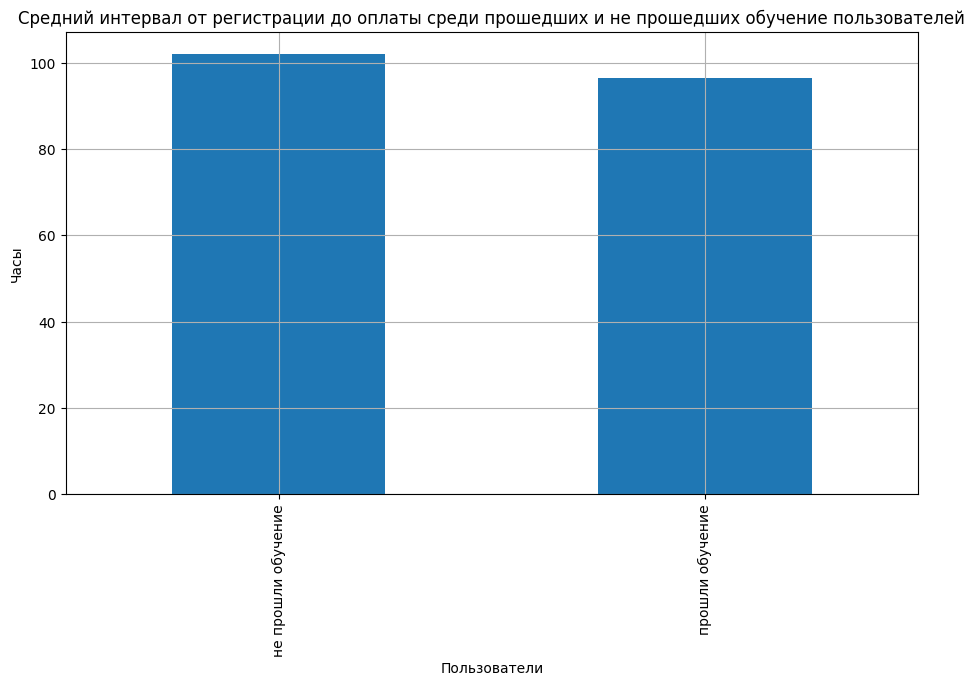

In [5]:
import matplotlib.pyplot as plt

td_mean.plot(
    kind='bar',
    figsize=(11,6),
    title="Средний интервал от регистрации до оплаты среди прошедших и не прошедших обучение пользователей",
    grid=True,
    xlabel="Пользователи",
    ylabel="Часы"
)


График показывает, что прошедшие успешное обучение пользователи переходят к стадии покупки новых вопросов для игры в среднем на 5,55 часа (5 часов, 34 минуты) раньше, чем не прошедшие обучение. Так же важно помнить, что они составляют 90,44% всех покупателей. 

## Задача 2 

Попробуем доказать, что обучение само по себе значимо при решении о покупке новых вопросов и не зависит от частоты прохождения обучения. Для этого нужно рассмотреть как часто пользователи,  начинали обучение, были ли такие, что делали это неоднократно, и как они после этого переходили к покупке новых пакетов. Продолжим работать со сводными таблицами, используя меnод группировки. В итоге мы должны получить информацию о коэффициенте конверсии (пользователей в покупателей), а так же выручке на покупателя. Эти данные помогут ответить на поставленный во второй гипотезе вопрос. 

In [6]:
tutorial_st_mask = total_events_df[total_events_df['event_type'] == 'tutorial_start'] # фильтруем из исходной таблицы действий данные о тех, кто начинал обучение
display("Количество строк в таблице : ", total_events_df['user_id'].nunique()) # контролируем правильность используемого источника данных

pivot_att = tutorial_st_mask.pivot_table( # строим сводную таблицу по количеству раз для пользователей, успешно прошедших обучение (завершивших его) 
    index='user_id', 
    values='tutorial_id',
    aggfunc='count'
).reset_index()
display("Количество попыток обучения, совершаемых пользователями (для каждого пользователя):", pivot_att)

purchase_df_2018_mask = purchase_df_2018[purchase_df_2018['event_type'] == 'purchase'] # фильтруем из исходной таблицы покупок данные о действиях пользователей (по признаку покупки)
pivot_psh = purchase_df_2018_mask.pivot_table( # строим сводную таблицу по факту покупок для каждого пользователя
    index='user_id',
    values='event_type',
    aggfunc='count'
  ).reset_index()
display("Пользовтаетли, совершавшие покупку: ", pivot_psh)

tut_att_prs_df = pivot_att.merge(pivot_psh, how='left', on='user_id').fillna(0) # объединим полученные сводные таблицы и перезапишем пустые значения на 0
tut_att_prs_df = tut_att_prs_df.rename(columns={'tutorial_id':'tutorial_attempt', 'event_type':'purchase'}) # новой таблице переименуем столбцы 
display("Таблица данных о количестве  попыток обучения и покупке новых впросов: ", tut_att_prs_df)

tut_attempt_df_p = tut_att_prs_df.merge(purchase_df_2018, how='left', on='user_id').drop(['purchase_id', 'start_time', 'event_type'], axis=1) # добавим в таблицу данные о сумме покупок 
#через объединение сводной объединенной таблицы с исходной таблицей покупок в 2018 году.
display("Таблица с данными о попытках обучения каждого пользователя, покупках и суммах, потраченных на вопросы:", tut_attempt_df_p)

# Построим таблицу, группирующую всех пользователей по количеству попыток обучения, переименовав имеющиеся столбцы
grupped_df = tut_attempt_df_p.groupby('tutorial_attempt').agg(
  users=pd.NamedAgg(column='user_id', aggfunc='count'),
  purchase_users=pd.NamedAgg(column='purchase', aggfunc='sum'),
  amount=pd.NamedAgg(column='amount',aggfunc='sum')
  ).reset_index()

display("Группы пользователей, сгруппированных по количеству обучений:", grupped_df)

grupped_df['conversion_rate'] = round((grupped_df['purchase_users'] / grupped_df['users'])*100,2) # добавим столбец "conversion_rate"
display("Коэффициент конверсии по группам в зависимости от количества обучения: ", grupped_df)
grupped_df['amount_per_user'] = round((grupped_df['amount'] / grupped_df['users']),2) # построим столбец, определяющий выручку на пользователя в зависимости от количества обучения
display("Выручка на покупателя в зависимости от количества обучения:", grupped_df)

#not_tutorial_df = total_events_df[(total_events_df['event_type'] != 'tutorial_start') & (total_events_df['event_type'] == 'purchase')]
#display(not_tutorial_df.info())
#display(not_tutorial_df['tutorial_id'].value_counts())

'Количество строк в таблице : '

19914

'Количество попыток обучения, совершаемых пользователями (для каждого пользователя):'

,user_id,tutorial_id
0,27833,1
1,27834,1
2,27835,1
3,27836,2
4,27839,1
...,...,...
11847,47738,1
11848,47741,1
11849,47742,1
11850,47743,1


'Пользовтаетли, совершавшие покупку: '

,user_id,event_type
0,27845,1
1,27865,1
2,27884,1
3,27910,1
4,27911,1
...,...,...
1595,47671,1
1596,47687,1
1597,47712,1
1598,47732,1


'Таблица данных о количестве  попыток обучения и покупке новых впросов: '

,user_id,tutorial_attempt,purchase
0,27833,1,0.0
1,27834,1,0.0
2,27835,1,0.0
3,27836,2,0.0
4,27839,1,0.0
...,...,...,...
11847,47738,1,0.0
11848,47741,1,0.0
11849,47742,1,1.0
11850,47743,1,0.0


'Таблица с данными о попытках обучения каждого пользователя, покупках и суммах, потраченных на вопросы:'

,user_id,tutorial_attempt,purchase,amount
0,27833,1,0.0,NaN
1,27834,1,0.0,NaN
2,27835,1,0.0,NaN
3,27836,2,0.0,NaN
4,27839,1,0.0,NaN
...,...,...,...,...
11847,47738,1,0.0,NaN
11848,47741,1,0.0,NaN
11849,47742,1,1.0,50.0
11850,47743,1,0.0,NaN


'Группы пользователей, сгруппированных по количеству обучений:'

,tutorial_attempt,users,purchase_users,amount
0,1,9097,1207.0,132475.0
1,2,1589,218.0,24950.0
2,3,427,51.0,5675.0
3,4,221,30.0,2950.0
4,5,109,16.0,1950.0
5,6,116,14.0,1675.0
6,7,94,12.0,1325.0
7,8,86,13.0,1350.0
8,9,113,17.0,2000.0


'Коэффициент конверсии по группам в зависимости от количества обучения: '

,tutorial_attempt,users,purchase_users,amount,conversion_rate
0,1,9097,1207.0,132475.0,13.27
1,2,1589,218.0,24950.0,13.72
2,3,427,51.0,5675.0,11.94
3,4,221,30.0,2950.0,13.57
4,5,109,16.0,1950.0,14.68
5,6,116,14.0,1675.0,12.07
6,7,94,12.0,1325.0,12.77
7,8,86,13.0,1350.0,15.12
8,9,113,17.0,2000.0,15.04


'Выручка на покупателя в зависимости от количества обучения:'

,tutorial_attempt,users,purchase_users,amount,conversion_rate,amount_per_user
0,1,9097,1207.0,132475.0,13.27,14.56
1,2,1589,218.0,24950.0,13.72,15.70
2,3,427,51.0,5675.0,11.94,13.29
3,4,221,30.0,2950.0,13.57,13.35
4,5,109,16.0,1950.0,14.68,17.89
5,6,116,14.0,1675.0,12.07,14.44
6,7,94,12.0,1325.0,12.77,14.10
7,8,86,13.0,1350.0,15.12,15.70
8,9,113,17.0,2000.0,15.04,17.70


In [7]:
import plotly
import plotly.express as px
fig_1 = px.bar(
    data_frame=grupped_df,
    x='tutorial_attempt',
    y='conversion_rate',
    text='conversion_rate',
    orientation='v',
    height=500, #высота
    width=1000, #ширина
    title= "Коэффициент конверсии пользователей в клиентов по группам (% от пользователей)"
)
display(fig_1)

На диаграмме видно, что во всех группах коэффициент конверсии находится в диапазоне 12-15%. Прямой или обратной зависимости данного показателя от количества обучений у пользователя нет. 

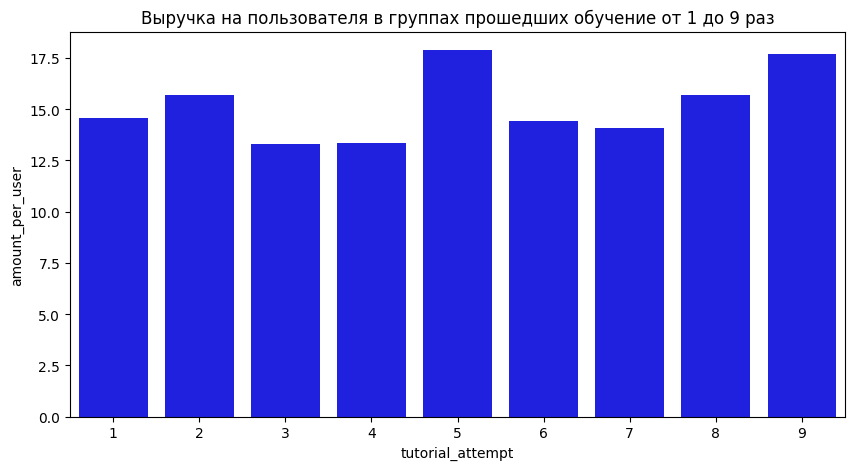

In [8]:
import seaborn as sns

fig1 = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=grupped_df,
    x='tutorial_attempt', # по умолчанию считает среднее по параметру столбца
    y='amount_per_user',
    color='blue'
)
barplot.set_title('Выручка на пользователя в группах прошедших обучение от 1 до 9 раз');


Выручка на покупателя в группах имеет несущественные отличия. В частности в группе обцчавшихся 5 и 9 раз она выше прочих. Но влияет ли это на общую выручку? 

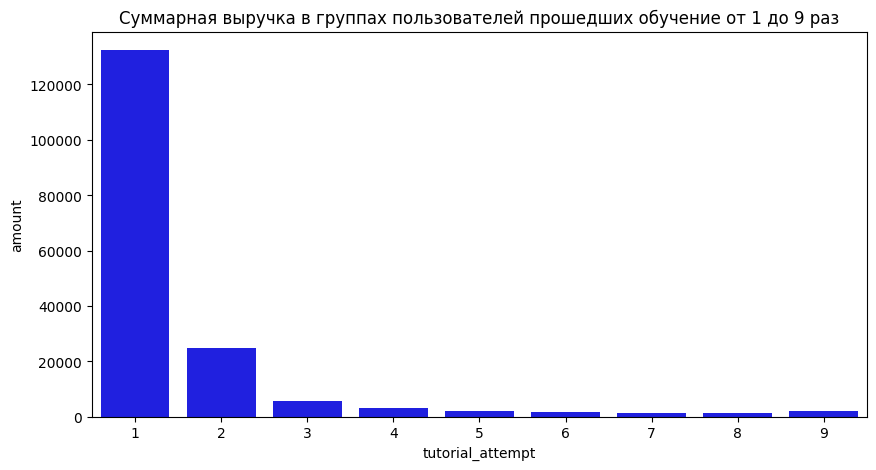

In [9]:
fig2 = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=grupped_df,
    x='tutorial_attempt', # по умолчанию считает среднее по параметру столбца
    y='amount',
    color='blue'
)
barplot.set_title('Суммарная выручка в группах пользователей прошедших обучение от 1 до 9 раз');

Как видим, львиную долю выручки приносит группа, обучавшихся один раз - самая многочисленная из всех. 

Количество прохождения обучения не влияет на конверсию, так как во всех группах данный показатель практически одинаков. Не увеличивает количество обучения и выручку на пользователя, которая так же во всех группах примерно равна. Очевидно, что для принятия решения о покупке нового пакета вопросов пользователям достаточно успешно пройти обучение всего лишь один раз, как и поступает большинство пользователей. Они же и генерируют основную долю выручки. Таким образом, гипотезу о том, что на решение перейти к покупке влияет сам факт обучения, а не количество прохождений обучения пользователем, можно считать доказанной.

## Задача 3

Оценим прозрачность взаимодействия с игрой для пользователя, ответив на попрос: как часто пользователи начинают обучение после того как выбрали уровень сложности?

 Для проверки гипотезы построим таблицы, позволяющие определить, насколько велика группа пользователей, которые переходили к началу обучения после выбора уровня сложности. Будем исходить при этом из того, что такое поведение отклоняется от стандартного и свидетельсвует о наличии сложностей в понимании игры у некоторой группы пользователей. 
Вернемся к сводным таблицам из блока решения Задачи 2

In [10]:

pivot_tedf_2018 = total_events_df.pivot_table( # создадим сводную таблицу на основе столбца "тип действия" из исходной объединенной таблицы
    values='start_time',
    index='user_id',
    columns='event_type',
    aggfunc='max' # берем последний по времени, а не первый "тип действия" из исходной объединенной таблицы.
).reset_index()

display("Построим и выведем сводную таблицу 'Тип действия' из исходной объединенной таблицы: ", pivot_tedf_2018) # 

pvt_st_df = pivot_tedf_2018[['user_id', 'tutorial_start']] # строим таблицу с данными о старте обучения пользователей
display("Старт обучения пользователей: ", pvt_st_df)

pvt_lch_df = pivot_tedf_2018[['user_id', 'level_choice']] # строим таблицу с данными о выборе уровня сложности пользователями
display("Выбор уровня сложности: ", pvt_lch_df)



"Построим и выведем сводную таблицу 'Тип действия' из исходной объединенной таблицы: "

event_type,user_id,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start
0,27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT
1,27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40
2,27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11
3,27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51
4,27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 15:40:43
...,...,...,...,...,...,...,...
19909,47741,2018-12-31 02:01:26,2018-12-31 02:10:17,NaT,2018-12-30 20:41:06,2018-12-30 23:14:29,2018-12-30 23:12:42
19910,47742,2018-12-31 04:58:15,2018-12-31 05:06:10,2019-01-04 12:51:41,2018-12-30 20:48:42,2018-12-31 02:47:11,2018-12-31 02:43:26
19911,47743,2018-12-31 02:23:50,2018-12-31 02:26:29,NaT,2018-12-30 21:27:31,2018-12-31 01:35:14,2018-12-31 01:33:29
19912,47744,2018-12-31 07:53:04,2018-12-31 07:59:18,NaT,2018-12-30 22:12:24,2018-12-31 06:55:04,2018-12-31 06:51:17


'Старт обучения пользователей: '

event_type,user_id,tutorial_start
0,27832,NaT
1,27833,2018-01-01 17:47:40
2,27834,2018-01-01 19:46:11
3,27835,2018-01-01 15:00:51
4,27836,2018-01-01 15:40:43
...,...,...
19909,47741,2018-12-30 23:12:42
19910,47742,2018-12-31 02:43:26
19911,47743,2018-12-31 01:33:29
19912,47744,2018-12-31 06:51:17


'Выбор уровня сложности: '

event_type,user_id,level_choice
0,27832,NaT
1,27833,NaT
2,27834,NaT
3,27835,2018-01-01 20:37:22
4,27836,NaT
...,...,...
19909,47741,2018-12-31 02:01:26
19910,47742,2018-12-31 04:58:15
19911,47743,2018-12-31 02:23:50
19912,47744,2018-12-31 07:53:04


Продолжим анализ на базе объединения таблиц "Старт обучения пользователей" и "Выбор уровня сложности". Это позволит нам оценить, насколько быстро прошедшие обучение начинают выбирать уровень сложности. И есть ли те, кто выбирает уровень сложности без прохождения обучения, но потом, все же возвращаются назад, чтобы обучение все-таки пройти.  

In [11]:
time_difference_df = pvt_st_df.merge(pvt_lch_df, how='left', on='user_id')  # соединяем таблицы начала обучения и выбора уровня сложности
display("Таблица начала обучения и выбора уровня сложности:", time_difference_df)
time_difference_df['difference_time'] = (time_difference_df['tutorial_start'] - time_difference_df['level_choice']) / pd.Timedelta('1 hour')  
# в отдельном столбце ищем разницу во времени, между началом учебы и выбором уровня сложности
display("Таблица оценки порядка прохождения этапов игры:", time_difference_df.head())

time_difference_df_max = time_difference_df['difference_time'].max()
time_difference_df_mean =  time_difference_df['difference_time'].mean()
#time_difference_df_min = time_difference_df['difference_time'].min()
print()
display("Максимальная разность между временем начала обучения и временем выбора уровня сложности: {}".format(time_difference_df_max), "минут положительная, значит есть те, кто возвращается")
display("Средняя разность между временем начала обучения и временем выбора уровня сложности: {}".format(time_difference_df_mean), "минут отрицательная, значит у большинства нет сложностей с прохождением")

print()
display("Описательная статистика выборки, позволяющей сравнить время начала обучения и выбора уровня сложности: ", time_difference_df.describe())


display("Количество пользователей: {}".format(len(time_difference_df)))

time_difference_df_m_plus = time_difference_df[time_difference_df['difference_time'] > 0] # строим фильтр, в котором оставим только тех, кто возвращался к обучению после выбора сложности
display("Описательная статистика выборки, включающей пользователей, которые выбирали начало обучения после выбора уровня сложности: ", time_difference_df_m_plus.describe()) # выводим количество тех, кто вынужден был вернуться на предыдущий шаг в игре 
display("Количество пользователей, вернувшихся к обучению: {}".format(time_difference_df_m_plus['user_id'].count()))
print()
#ln_td_df = time_difference_df['user_id'].
return_users = time_difference_df_m_plus['user_id'].count() # запишем для удобства количество возвращающихся пльзователей в переменную
ln_td_df = len(time_difference_df) # так же в отдельную переменную запишем количество всех пользователей, которые совершали любой выбор
percent_of_ret = return_users / ln_td_df
display("Доля пользователей, вынужденных возвращаться к обучению после выбора уровня сложности: {:.2%}".format(percent_of_ret))

'Таблица начала обучения и выбора уровня сложности:'

event_type,user_id,tutorial_start,level_choice
0,27832,NaT,NaT
1,27833,2018-01-01 17:47:40,NaT
2,27834,2018-01-01 19:46:11,NaT
3,27835,2018-01-01 15:00:51,2018-01-01 20:37:22
4,27836,2018-01-01 15:40:43,NaT
...,...,...,...
19909,47741,2018-12-30 23:12:42,2018-12-31 02:01:26
19910,47742,2018-12-31 02:43:26,2018-12-31 04:58:15
19911,47743,2018-12-31 01:33:29,2018-12-31 02:23:50
19912,47744,2018-12-31 06:51:17,2018-12-31 07:53:04


'Таблица оценки порядка прохождения этапов игры:'

event_type,user_id,tutorial_start,level_choice,difference_time
0,27832,NaT,NaT,NaN
1,27833,2018-01-01 17:47:40,NaT,NaN
2,27834,2018-01-01 19:46:11,NaT,NaN
3,27835,2018-01-01 15:00:51,2018-01-01 20:37:22,-5.608611
4,27836,2018-01-01 15:40:43,NaT,NaN


'Максимальная разность между временем начала обучения и временем выбора уровня сложности: 23.8575'

'минут положительная, значит есть те, кто возвращается'

'Средняя разность между временем начала обучения и временем выбора уровня сложности: -0.9954900552858684'

'минут отрицательная, значит у большинства нет сложностей с прохождением'

'Описательная статистика выборки, позволяющей сравнить время начала обучения и выбора уровня сложности: '

event_type,user_id,tutorial_start,level_choice,difference_time
count,19914.000000,11852,8338,8240.000000
mean,37788.500000,2018-07-02 23:11:46.039402752,2018-07-04 04:51:24.129647360,-0.995490
min,27832.000000,2018-01-01 15:00:51,2018-01-01 20:37:22,-7.138333
25%,32810.250000,2018-03-24 15:36:38.750000128,2018-03-24 23:51:21.750000128,-3.197153
50%,37788.500000,2018-06-23 15:26:06,2018-06-24 00:29:52.500000,-1.843889
75%,42766.750000,2018-10-12 05:46:42.750000128,2018-10-14 15:58:03.249999872,-0.499722
max,47745.000000,2018-12-31 07:14:38,2018-12-31 09:59:00,23.857500
std,5748.820966,NaN,NaN,3.848359


'Количество пользователей: 19914'

'Описательная статистика выборки, включающей пользователей, которые выбирали начало обучения после выбора уровня сложности: '

event_type,user_id,tutorial_start,level_choice,difference_time
count,1386.000000,1386,1386,1386.000000
mean,37629.218615,2018-06-30 15:12:23.238816768,2018-06-30 09:19:54.111111168,5.874758
min,27842.000000,2018-01-02 07:08:00,2018-01-02 06:19:18,0.001667
25%,32662.000000,2018-03-22 07:02:29,2018-03-22 03:40:59.750000128,2.088681
50%,37546.000000,2018-06-22 02:13:43.500000,2018-06-21 18:26:01,4.791944
75%,42316.500000,2018-10-05 04:26:38.249999872,2018-10-04 20:58:16,8.893542
max,47724.000000,2018-12-31 02:47:53,2018-12-30 13:21:12,23.857500
std,5721.419779,NaN,NaN,4.574726


'Количество пользователей, вернувшихся к обучению: 1386'

'Доля пользователей, вынужденных возвращаться к обучению после выбора уровня сложности: 6.96%'

Как видим, логика игры понятна абсолютному большинству пользователей: только 6,96% пользователей перепрыгивают через этап обучения, но и они в конечном итоге предпочитают пройти обучение в игре. Как мы помним из рассмотрения предыдущей гипотезы, тем самым повышается шанс приобретения новых вопросов с их стороны. 

## Выводы

### 1. Успешное обучение само по себе чаще приводит пользователей к покупке новых вопросов для продолжения игры. Эта группа в 2018 году составила 90,44%.  Прошедшие успешное обучение пользователи переходят к стадии покупки новых вопросов для игры в среднем на 5,55 часа (5 часов, 34 минуты) раньше, чем не прошедшие обучение. 

### 2. Количество прохождения обучения не влияет на конверсию, так как во всех группах данный показатель практически одинаков. Не увеличивает количество обучения и выручку на пользователя, которая так же во всех группах примерно равна. Очевидно, что для принятия решения о покупке нового пакета вопросов пользователям достаточно успешно пройти обучение всего лишь один раз, как и поступает большинство пользователей. Они же и генерируют основную долю выручки. Таким образом, на решение перейти к покупке влияет сам факт обучения, а не количество прохождений обучения пользователем.

### 3. Логика игры понятна абсолютному большинству пользователей: только 6,96% пользователей перепрыгивают через этап обучения, но и они в конечном итоге предпочитают пройти обучение в игре. Как мы помним из рассмотрения предыдущей гипотезы, тем самым повышается шанс преобретения новых вопросов с их стороны.